In [1]:
!python -V

Python 3.10.13


In [2]:
!pip3 install pandas

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_squared_error

In [6]:
!pip install pyarrow fastparquet

In [7]:
train_file = "/workspaces/mlops-zoomcamp/data/yellow_tripdata_2023-01.parquet"
val_file = "/workspaces/mlops-zoomcamp/data/yellow_tripdata_2023-02.parquet"
# categorical = ['PULocationID', 'DOLocationID']
categorical = ['PU_DO']
numerical = ['trip_distance']

def read_dataframe(filename):
    df1 = pd.read_parquet(filename)

    df1.tpep_pickup_datetime = pd.to_datetime(df1.tpep_pickup_datetime)
    df1.tpep_dropoff_datetime = pd.to_datetime(df1.tpep_dropoff_datetime)

    df1["duration"] = df1.tpep_dropoff_datetime - df1.tpep_pickup_datetime

    df1["duration"] = df1.duration.apply(lambda td: td.total_seconds() / 60)

    df1["PULocationID"] = df1['PULocationID'].astype(str)
    df1["DOLocationID"] = df1['DOLocationID'].astype(str)
    df1["PU_DO"] = df1["PULocationID"] + "_" + df1["DOLocationID"]

    df = df1[((df1.duration >= 10) & (df1.duration <= 60))]


    df[categorical] = df[categorical].astype(str)
    return df

In [ ]:
df_train = read_dataframe(train_file)
df_val = read_dataframe(val_file)

/tmp/ipykernel_18839/3666367200.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


: 

In [5]:
df_train.duration.describe()

NameError: name 'df_train' is not defined

In [ ]:
print(len(df_train), len(df_val))

1756698 1700678


In [ ]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
Y_train = df_train[target].values


In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_train)
mean_squared_error(y_true=Y_train, y_pred=y_pred, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.591270447403998

/tmp/ipykernel_70695/2222844295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="predictions")
/tmp/ipykernel_70695/2222844295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train, label='actual')


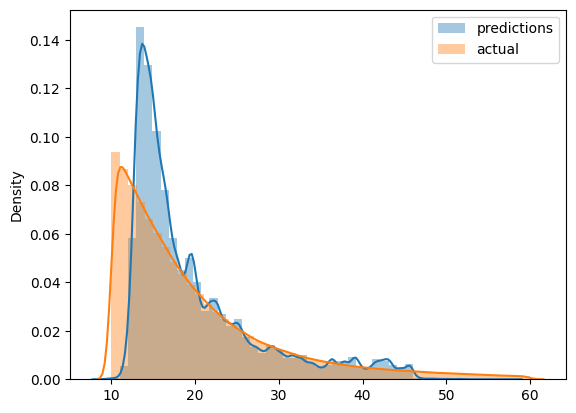

In [ ]:
sns.distplot(y_pred, label="predictions")
sns.distplot(Y_train, label='actual')

plt.legend()

In [ ]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [ ]:
target = 'duration'
Y_train = df_train[target].values
Y_val = df_val[target].values

In [ ]:
lr = Lasso(0.01)
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_val)
mean_squared_error(y_true=Y_val, y_pred=y_pred, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.884172477273083

In [ ]:
import pickle

with open("models/lin_reg.bin", 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

FileNotFoundError: [Errno 2] No such file or directory: 'models/lin_reg.bin'